In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Embedding,Dense,Dropout
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:

df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:

df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


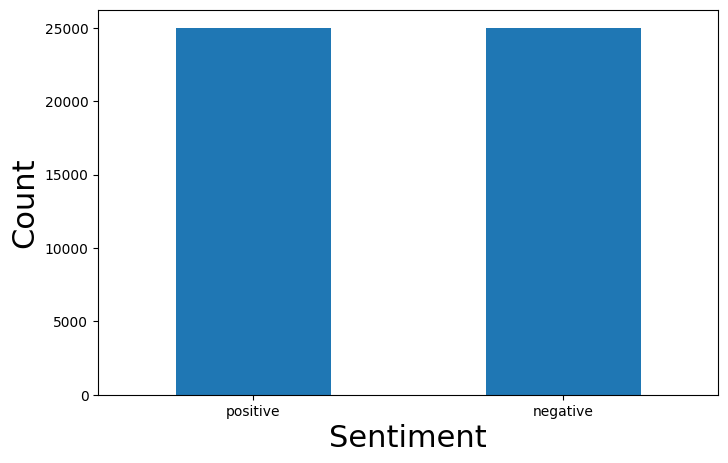

In [5]:

plt.figure(figsize=(8,5))
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment',size=22)
plt.ylabel('Count',size=22)
plt.xticks(rotation='horizontal')
plt.show()


# Now start cleaning the data

In [6]:

df.isnull().sum()


,0
review,0
sentiment,0


In [7]:

df.duplicated().sum()


418

In [8]:


df.drop_duplicates(inplace=True)


In [9]:

df.duplicated().sum()


0

In [10]:

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:

df['review'].unique()


array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [12]:

import re
def function(text):
  return re.sub(r'[^a-zA-Z]',' ',text)

df['review'].apply(function).unique()

array(['One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to

In [13]:


def for_extra_space(text):
  return re.sub(r'\s+[^a-zA-Z]\s+',' ',text)

df['review'].apply(for_extra_space).unique()


array(["One of the other reviewers has mentioned that after watching just Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to t

In [14]:

def for_extra_space(text):
  return re.sub(r'[^a-zA-Z]\s+',' ',text)

df['review'].apply(for_extra_space).unique()


array(["One of the other reviewers has mentioned that after watching just  Oz episode you'll be hooked They are right as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [16]:
# Making a function
def preprocess(text):

  # converting into the lower case
  text = text.lower()
  # now removing all extra symbol and number
  text = re.sub(r'[^a-zA-Z]',' ',text)
  # here removing the extra space
  text = re.sub(r'\s+[^a-zA-Z]\s+',' ',text)
  # removing the apostropy s
  text = re.sub(r'[^a-zA-Z]\s+',' ',text)
  # removing the stopwords
  pattern = re.compile(r'\b(' +r'|'.join(stopwords.words('english')) +r')\b\s')
  text = re.sub(pattern,'',text)

  return text

df['review'] = df['review'].apply(preprocess)
df['review']


,review
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter mattei love time money visually stunnin...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,going disagree previous comment side maltin on...


In [17]:

df['review'].unique()


array(['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitc

In [18]:

ps = PorterStemmer()
def porter(text):
  return ' '.join([ps.stem(word) for word in text.split()])

df['review'] = df['review'].apply(porter)
df['review']


,review
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...
...,...
49995,thought movi right good job creativ origin fir...
49996,bad plot bad dialogu bad act idiot direct anno...
49997,cathol taught parochi elementari school nun ta...
49998,go disagre previou comment side maltin one sec...


In [19]:
df['review'].unique()


array(['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get t

In [20]:

# def convert_sentiment_into_number(text):

#     if text == 'positive':
#       return 1
#     else:
#       return 0

# df['sentiment'] = df['sentiment'].apply(convert_sentiment_into_number)
# df['sentiment']



In [21]:

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df['sentiment']


,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [22]:

# copy the data into another variable
df2 = df.copy()


In [23]:

df2.head()


,review,sentiment
0,one review mention watch oz episod hook right ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [24]:

# now split the data into train and test
train_data,test_data = train_test_split(df2,test_size=0.2)
train_data


,review,sentiment
14440,movi modern day scarfac toe movi one rare epic...,1
45723,stori screen first must say touch movi best su...,0
44551,spoiler like evil tinker ever chanc doubl play...,0
23273,neg review expect movi like masterpiec movi tr...,1
41941,veteran sleazebal bruno mattei erot thriller c...,0
...,...,...
29120,possibl worst movi ever seen somebodi pleas ex...,0
36750,watch unrat version movi person studi life cri...,0
30471,cinderella stori made adult live dreamland rom...,0
37555,great great great say movi imdb want least fou...,1


In [25]:

# using the tokenizer
token = Tokenizer(num_words=7000)
token.fit_on_texts(train_data['review'])

train_tokenizer = token.texts_to_sequences(train_data['review'])
test_tokenizer = token.texts_to_sequences(test_data['review'])
train_tokenizer


[[2,
  574,
  90,
  6358,
  5022,
  2,
  4,
  748,
  1301,
  3,
  8,
  49,
  548,
  185,
  5,
  61,
  429,
  1599,
  812,
  429,
  61,
  443,
  443,
  34,
  5,
  447,
  18,
  19,
  917,
  2,
  15,
  5,
  46,
  296,
  1209,
  18,
  2,
  25,
  262,
  625,
  2,
  6,
  852,
  32,
  25,
  23,
  18,
  2,
  27,
  1750,
  5429,
  307,
  17,
  76,
  10,
  174,
  5,
  2,
  25,
  298,
  125,
  10],
 [14,
  161,
  29,
  125,
  38,
  438,
  2,
  52,
  684,
  16,
  14,
  163,
  39,
  718,
  625,
  98,
  12,
  379,
  911,
  10,
  161,
  338,
  6,
  1,
  1,
  438],
 [550,
  5,
  394,
  55,
  453,
  1212,
  31,
  877,
  6607,
  4694,
  394,
  3760,
  4452,
  6359,
  45,
  66,
  1382,
  570,
  1977,
  132,
  264,
  91,
  151,
  796,
  4824,
  309,
  429,
  271,
  796,
  2394,
  1880,
  3288,
  1230,
  399,
  774,
  2707,
  1312,
  1326,
  3275,
  1,
  1,
  54,
  220,
  6,
  8,
  6019,
  385,
  2651,
  1330,
  226,
  783,
  238,
  134,
  12,
  95,
  5851,
  1970,
  319,
  1576,
  551,
  151,
  26,
  299,

In [26]:

# here using the pad_sequence
x_train_sequence = pad_sequences(train_tokenizer,maxlen=200)
x_test_sequence = pad_sequences(test_tokenizer,maxlen=200)
x_train_sequence


array([[  0,   0,   0, ..., 298, 125,  10],
       [  0,   0,   0, ...,   1,   1, 438],
       [797,  94, 377, ...,  54, 166, 121],
       ...,
       [  0,   0,   0, ..., 870, 234,   5],
       [  0,   0,   0, ...,   4, 289,  25],
       [  0,   0,   0, ...,  10, 347,   4]], dtype=int32)

In [27]:
# now extracting the y_train in the train_data

y_train = train_data['sentiment']
y_test = test_data['sentiment']

y_train



,sentiment
14440,1
45723,0
44551,0
23273,1
41941,0
...,...
29120,0
36750,0
30471,0
37555,1


# Start buliding the Model

In [28]:

model = Sequential()
# 1st layers
model.add(Embedding(7000,100,input_length=200))
model.add(LSTM(64,return_sequences=True))
# 2nd layers
model.add(LSTM(120,return_sequences=True))
# 3rd layers
model.add(LSTM(240,return_sequences=True))
# 4 layers
model.add(LSTM(380,return_sequences=True))
# 5 layers
model.add(LSTM(520,return_sequences=True))
# 6 layers
model.add(LSTM(720))
# 6 layers
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='Adam')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# fit the model
history = model.fit(x_train_sequence,y_train,epochs=5,validation_data=(x_test_sequence,y_test))


Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 216s 166ms/step - accuracy: 0.7214 - loss: 0.5044 - val_accuracy: 0.8836 - val_loss: 0.2956
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 257s 165ms/step - accuracy: 0.9068 - loss: 0.2444 - val_accuracy: 0.8888 - val_loss: 0.2973
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 261s 164ms/step - accuracy: 0.9091 - loss: 0.2384 - val_accuracy: 0.8817 - val_loss: 0.2986
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 262s 164ms/step - accuracy: 0.9329 - loss: 0.1858 - val_accuracy: 0.8751 - val_loss: 0.3158
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 207s 167ms/step - accuracy: 0.9464 - loss: 0.1529 - val_accuracy: 0.8779 - val_loss: 0.3104


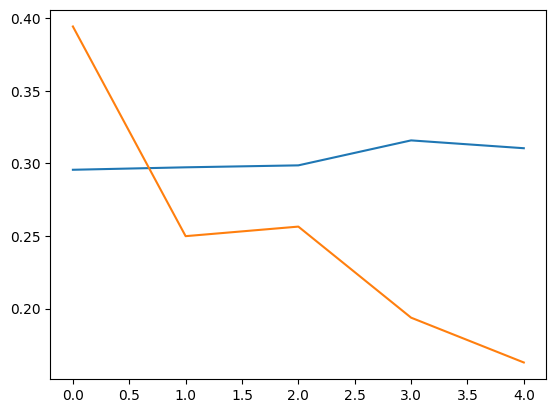

In [30]:

plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.show()


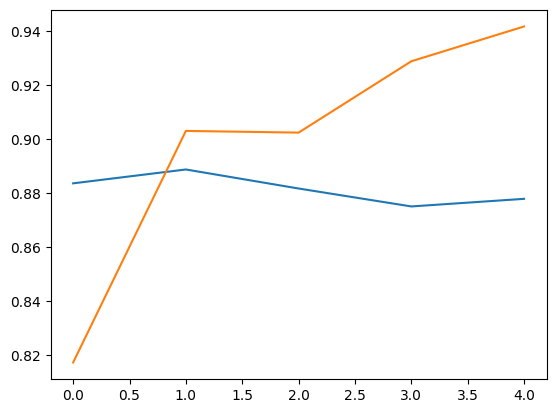

In [31]:

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.show()



# Test the Model

In [32]:

model.predict(x_test_sequence)


310/310 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


array([[0.9147578 ],
       [0.7009089 ],
       [0.04906531],
       ...,
       [0.99181634],
       [0.08462951],
       [0.6929187 ]], dtype=float32)

In [42]:
input = "This movie is not a good movie because there is a lake of actions"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Negative


In [43]:
input = "This movie is not a good movie"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Negative


In [35]:
input = "that is a very bad movie"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Negative


In [36]:

input = "movie is not stand on the expectation"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Negative


In [37]:

input = "it is not a good movie"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Negative


In [38]:

input = "I dont like this movie"
input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Negative


In [39]:

input="""Pushpa 2: The Rule, the much-anticipated sequel to the blockbuster Pushpa: The Rise, has arrived, and it does not disappoint! Directed by Sukumar and starring Allu Arjun in his iconic role as Pushpa Raj, this film is a high-octane, emotionally charged journey that elevates its predecessor to new heights.

The narrative picks up right where the first film left off, plunging us back into the tumultuous world of sandalwood smuggling and the intense power struggles that come with it. The story is rich with unforgettable moments that blend action, drama, and romance, ensuring that audiences are captivated from start to finish.

**Performance**

Allu Arjun delivers a powerhouse performance that solidifies his status as one of the leading actors in Indian cinema. His portrayal of Pushpa Raj is both ferocious and nuanced, showcasing a character that is as vulnerable as he is relentless. The way he captures the emotional struggles of his character while navigating through betrayal and ambition is commendable.

The supporting cast is equally impressive, with Rashmika Mandanna shining as Srivalli, bringing depth and warmth to her role. Fahadh Faasil makes a thrilling entry as the antagonist, further enhancing the stakes with his stellar performance. The chemistry between the lead characters is electric, creating a compelling love story that adds layers to the narrative.

**Direction and Cinematography**

Sukumar’s direction is top-notch, expertly balancing the film's intense action sequences with poignant moments of character development. The pacing is superb; every scene feels purposeful and engaging. The cinematography by Miroslaw Brożek is breathtaking, capturing the lush landscapes and gritty environments that define Pushpa's world. The visuals are accompanied by a pulsating score that elevates each scene, making for an immersive viewing experience.

**Action and Choreography**

The action sequences in Pushpa 2 are a standout feature. They are creatively choreographed, blending realism with stylized flair that keeps viewers on the edge of their seats. Whether it's intense face-offs or breathtaking chase sequences, the film ensures that each moment is thrilling and impactful.

**Overall Impact**

Pushpa 2 is not just a sequel; it’s a statement. It expands on the themes of power, loyalty, and perseverance introduced in the first film, taking the audience on an unforgettable ride. The film's emotional depth, combined with its action-packed sequences, resonates strongly, making it a cinematic experience that lingers long after the credits roll.

In conclusion, Pushpa 2: The Rule is a triumphant sequel that sets a new benchmark for Indian cinema. Allu Arjun and the entire cast deliver remarkable performances, supported by stellar direction and breathtaking visuals. It’s a must-watch for anyone who enjoys gripping storytelling and exhilarating action. Don't miss this cinematic spectacle that truly lives up to the hype!"""

input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Positive


In [40]:

input="""

Pushpa: The Rule, directed by Sukumar and the sequel to the 2021 blockbuster Pushpa: The Rise, delivers a captivating continuation of the story of Pushpa Raj, the fearless and rebellious red sandalwood smuggler, played with remarkable intensity by Allu Arjun. The film continues the journey of Pushpa as he faces new challenges, power struggles, and personal conflicts, with higher stakes and more explosive action sequences.

The film’s greatest strength is Allu Arjun's powerful performance, which elevates the character of Pushpa into an iconic figure in Indian cinema. His portrayal is filled with raw emotion, charm, and a sense of defiance that resonates with audiences. His swag and attitude continue to captivate, and he seamlessly carries the film through its emotional highs and action-packed lows. His dialogues, many of which have become popular catchphrases, continue to energize fans.

Rashmika Mandanna returns as Srivalli, offering more depth to her character. While she remains a key emotional anchor for Pushpa, the sequel gives her a bit more screen space to develop her relationship with him. Fahadh Faasil, playing the role of Bhanwar Singh Shekhawat, the antagonist, brings a menacing yet calculated performance, giving Pushpa a formidable rival. The power struggle between Pushpa and Shekhawat drives much of the plot, and their rivalry makes for compelling viewing.

Sukumar’s direction is top-notch, as he continues to craft a raw, gritty world filled with tension, high-octane sequences, and a strong sense of realism. The narrative is gripping, filled with unexpected twists and turns that keep the audience engaged. The dialogues are impactful, and the rural backdrop adds authenticity to the story. The cinematography by Mirosław Kuba Broż and the action choreography are spectacular, delivering an immersive experience.

The film's soundtrack, composed by Devi Sri Prasad, is another highlight. The music, especially the background score, intensifies the action sequences and amplifies the film's emotional beats. The song "Saami Saami" and the intense "Srivalli" track continue to make waves, becoming popular chart-toppers. The iconic Pushpa theme, with its intense beats, is unforgettable and sets the tone for the movie.

On the downside, while Pushpa: The Rule is an engaging watch, its pacing sometimes falters, with certain scenes dragging a bit longer than necessary. Some of the subplots are a bit formulaic, and the excessive focus on action sequences may overshadow the depth of the story for some viewers.

In conclusion, Pushpa: The Rule is a solid sequel that expands on the universe established in the first film. With Allu Arjun in his element, strong performances from the supporting cast, and Sukumar’s masterful direction, the film is a rollercoaster of emotions, drama, and action. It’s a must-watch for fans of the original film and those who enjoy gripping, larger-than-life tales of rebellion and And then other words movie is always wathach to everyone so thank you so much for this type of cinema making great movie experiences


"""

input_token = token.texts_to_sequences([input])
# now here using pad_sequence
input_sequence = pad_sequences(input_token,maxlen=200)
# now put into the model
y_pred = model.predict(input_sequence)

if y_pred > 0.5:
  print('Positive')
else:
  print('Negative')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Positive


In [41]:
model.save('model_review_2.h5')

In [44]:

import pickle
with open('le_2.pkl','wb') as file:
  pickle.dump(le,file)


In [45]:

with open('token_2.pkl','wb') as file:
  pickle.dump(token,file)
